<a href="https://colab.research.google.com/github/sometimdude/CNNstuff/blob/main/Main_CNN_Advanced_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install  wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.7 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import librosa
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from google.colab import drive


# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def get_labels(data_path, session_participants):
    labels = []
    for session, participants in session_participants.items():
        for participant in participants:
            participant_folder = os.path.join(data_path, participant)
            participant_file = os.path.join(participant_folder, f"{participant}.npy")
            if os.path.isdir(participant_folder) and os.path.isfile(participant_file):
                labels.append(participant)
            else:
                print(f"Folder or file not found: {participant_folder} or {participant_file}")
    # Remove duplicates and sort labels
    labels = sorted(set(labels))
    label_indices = np.arange(0, len(labels))
    one_hot_encoded = to_categorical(label_indices)
    return labels, label_indices, one_hot_encoded

# Example usage
DATA_PATH = '/content/drive/My Drive/ML Audio'
session_participants = {
   'S03': ['P09', 'P10', 'P11', 'P12'],
    'S04': ['P09', 'P10', 'P11', 'P12'],
    'S05': ['P13', 'P14', 'P15', 'P16'],
    'S06': ['P13', 'P14', 'P15', 'P16'],
    'S07': ['P17', 'P18', 'P19', 'P20'],
    'S17': ['P17', 'P18', 'P19', 'P20'],
    'S08': ['P21', 'P22', 'P23', 'P24'],
    'S16': ['P21', 'P22', 'P23', 'P24'],
    'S12': ['P33', 'P34', 'P35', 'P36'],
    'S13': ['P33', 'P34', 'P35', 'P36'],
    'S19': ['P49', 'P50', 'P51', 'P52'],
    'S20': ['P49', 'P50', 'P51', 'P52'],
    'S18': ['P41', 'P42', 'P43', 'P44'],
    'S22': ['P41', 'P42', 'P43', 'P44'],
    'S23': ['P53', 'P54', 'P55', 'P56'],
    'S24': ['P53', 'P54', 'P55', 'P56']
}
train_labels, train_label_indices, train_label_one_hot = get_labels(DATA_PATH, session_participants)

In [ ]:
import librosa
import numpy as np
import os

def extract_mfcc(file_path, max_pad_length=400):
    audio, sr = librosa.load(file_path, mono=True)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

    # Check if the MFCC feature array is longer than max_pad_length
    if mfcc.shape[1] > max_pad_length:
        # If so, truncate the MFCC array
        mfcc = mfcc[:, :max_pad_length]
    else:
        # Otherwise, pad the MFCC array
        pad_width = max_pad_length - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')

    return mfcc

# Base directory containing label subfolders
base_directory = '/content/drive/My Drive/ML Audio'

# Iterate through each subfolder (label) in the base directory
for label_folder in os.listdir(base_directory):
    label_folder_path = os.path.join(base_directory, label_folder)

    # Check if it's a directory
    if os.path.isdir(label_folder_path):
        # Process each audio file in the label subfolder
        for file_name in os.listdir(label_folder_path):
            if file_name.endswith('.wav'):
                file_path = os.path.join(label_folder_path, file_name)
                mfcc_features = extract_mfcc(file_path)
                npy_file_name = file_name.replace('.wav', '.npy')
                npy_file_path = os.path.join(label_folder_path, npy_file_name)
                np.save(npy_file_path, mfcc_features)

In [ ]:
import os
import librosa
import numpy as np
from tqdm import tqdm

def wav2mfcc_multi_channel(file_path, n_mfcc=20, max_len=11):
    wave, sr = librosa.load(file_path, mono=False, sr=44100)
    mfccs = []

    for channel in range(wave.shape[0]):
        channel_wave = wave[channel, :]
        mfcc = librosa.feature.mfcc(y=channel_wave, sr=sr, n_mfcc=n_mfcc)

        if max_len > mfcc.shape[1]:
            pad_width = max_len - mfcc.shape[1]
            mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
        else:
            mfcc = mfcc[:, :max_len]

        mfccs.append(mfcc)

    return np.array(mfccs)

LABEL_DATA_PATH = '/content/drive/My Drive/ML Audio'
labels = ['P09', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P33', 'P34', 'P35', 'P36', 'P41', 'P42', 'P43', 'P44', 'P49', 'P50', 'P51', 'P52', 'P53', 'P54', 'P55', 'P56']

def save_data_to_array(path=LABEL_DATA_PATH, labels=labels, max_len=11, n_mfcc=20):
    for label in labels:
        mfcc_vectors = []
        label_folder_path = os.path.join(path, label)
        if os.path.isdir(label_folder_path):
            wavfiles = [os.path.join(label_folder_path, wavfile) for wavfile in os.listdir(label_folder_path) if wavfile.endswith('.wav')]
            for wavfile in tqdm(wavfiles, "Saving vectors of label - '{}'".format(label)):
                mfcc = wav2mfcc_multi_channel(wavfile, max_len=max_len, n_mfcc=n_mfcc)
                mfcc_vectors.append(mfcc)
            np.save(os.path.join(label_folder_path, label + '.npy'), mfcc_vectors)  # Save MFCCs with correct extension

# Call the function to save data
save_data_to_array()

Saving vectors of label - 'P56': 100%|██████████| 1/1 [00:00<00:00,  6.17it/s]


In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

def load_dataset(base_path, session_participants, dataset_type='train', test_size=0.2, random_state=42):
    print(f"Loading dataset from {base_path}")

    X = []
    y = []
    all_labels = []

    # Loop through each session and its participants
    for session, participants in session_participants.items():
        for participant in participants:
            label = participant
            if label not in all_labels:
                all_labels.append(label)

            mfcc_file = os.path.join(base_path, label, f"{label}.npy")
            print(f"Checking file: {mfcc_file}")
            if os.path.isfile(mfcc_file):
                mfcc_vectors = np.load(mfcc_file)
                if mfcc_vectors.size == 0:
                    print(f"The array for {label} is empty. Skipping.")
                    continue
                X.extend(mfcc_vectors)
                y.extend([label] * len(mfcc_vectors))
            else:
                print(f"No MFCC file found for label: {label}")

    if len(X) == 0 or len(y) == 0:
        print("No data loaded. Check the data files and loading process.")
        return None, None, None, None

    # Convert labels to one-hot encodings
    label_indices = {label: idx for idx, label in enumerate(all_labels)}
    y = [label_indices[label] for label in y]
    y = to_categorical(y, num_classes=len(all_labels))

    X = np.array(X, dtype=object)
    y = np.array(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    print(f"X_train is None: {X_train is None}")
    print(f"X_test is None: {X_test is None}")
    print(f"y_train is None: {y_train is None}")
    print(f"y_test is None: {y_test is None}")
 # Print the shapes of X_train and X_test
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    return X_train, X_test, y_train, y_test

# Usage example
train_data_path = '/content/drive/My Drive/ML Audio'
X_train, X_test, y_train, y_test = load_dataset(train_data_path, session_participants, dataset_type='train')

Loading dataset from /content/drive/My Drive/ML Audio
Checking file: /content/drive/My Drive/ML Audio/P09/P09.npy
Checking file: /content/drive/My Drive/ML Audio/P10/P10.npy
Checking file: /content/drive/My Drive/ML Audio/P11/P11.npy
Checking file: /content/drive/My Drive/ML Audio/P12/P12.npy
Checking file: /content/drive/My Drive/ML Audio/P09/P09.npy
Checking file: /content/drive/My Drive/ML Audio/P10/P10.npy
Checking file: /content/drive/My Drive/ML Audio/P11/P11.npy
Checking file: /content/drive/My Drive/ML Audio/P12/P12.npy
Checking file: /content/drive/My Drive/ML Audio/P13/P13.npy
Checking file: /content/drive/My Drive/ML Audio/P14/P14.npy
Checking file: /content/drive/My Drive/ML Audio/P15/P15.npy
Checking file: /content/drive/My Drive/ML Audio/P16/P16.npy
Checking file: /content/drive/My Drive/ML Audio/P13/P13.npy
Checking file: /content/drive/My Drive/ML Audio/P14/P14.npy
Checking file: /content/drive/My Drive/ML Audio/P15/P15.npy
Checking file: /content/drive/My Drive/ML Audi

In [ ]:
# Check the data type and shape of y_train and y_test
print(f"y_train data type: {y_train.dtype}, y_train shape: {y_train.shape}")
print(f"y_test data type: {y_test.dtype}, y_test shape: {y_test.shape}")

# If y_train and y_test are not integer arrays or are not 1-dimensional, convert them
if y_train.dtype != 'int' or len(y_train.shape) != 1:
    # Convert y_train to integer and ensure it's 1-dimensional
    y_train = y_train.astype(int).flatten()

if y_test.dtype != 'int' or len(y_test.shape) != 1:
    # Convert y_test to integer and ensure it's 1-dimensional
    y_test = y_test.astype(int).flatten()

# Proceed with one-hot encoding
#y_train_hot = np.zeros((y_train.shape[0], num_classes))
#y_train_hot[np.arange(y_train.shape[0]), y_train] = 4

#y_test_hot = np.zeros((y_test.shape[0], num_classes))
#y_test_hot[np.arange(y_test.shape[0]), y_test] = 4

y_train data type: float32, y_train shape: (51, 32)
y_test data type: float32, y_test shape: (13, 32)


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
import wandb
from wandb.keras import WandbCallback
import matplotlib.pyplot as plt

In [ ]:
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

y_train shape: (1632,)
y_test shape: (416,)


In [ ]:
from sklearn.model_selection import train_test_split

def get_train_test(data_path, session_participants):
    session_label_info = get_labels(data_path, session_participants)
    print(f"Found session labels info: {session_label_info}")

    try:
        X_train, X_test, y_train, y_test = load_dataset(data_path, session_participants, dataset_type='train')

        # Check if any of the arrays are empty
        if not (X_train.size and X_test.size and y_train.size and y_test.size):
            raise ValueError("One or more data arrays are empty.")

    except Exception as e:
        print(f"Error during data loading: {e}")
        return None, None, None, None

    print(f"X_train shape: {X_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"y_test shape: {y_test.shape}")

    return X_train, X_test, y_train, y_test

# Assume session_participants is a dictionary mapping session IDs to participant labels
session_participants = {
   'S03': ['P09', 'P10', 'P11', 'P12'],
    'S04': ['P09', 'P10', 'P11', 'P12'],
    'S05': ['P13', 'P14', 'P15', 'P16'],
    'S06': ['P13', 'P14', 'P15', 'P16'],
    'S07': ['P17', 'P18', 'P19', 'P20'],
    'S17': ['P17', 'P18', 'P19', 'P20'],
    'S08': ['P21', 'P22', 'P23', 'P24'],
    'S16': ['P21', 'P22', 'P23', 'P24'],
    'S12': ['P33', 'P34', 'P35', 'P36'],
    'S13': ['P33', 'P34', 'P35', 'P36'],
    'S19': ['P49', 'P50', 'P51', 'P52'],
    'S20': ['P49', 'P50', 'P51', 'P52'],
    'S18': ['P41', 'P42', 'P43', 'P44'],
    'S22': ['P41', 'P42', 'P43', 'P44'],
    'S23': ['P53', 'P54', 'P55', 'P56'],
    'S24': ['P53', 'P54', 'P55', 'P56']
}


data_path = '/content/drive/My Drive/ML Audio'
X_train, X_test, y_train, y_test = get_train_test(data_path, session_participants)

if X_train is None:
    print("Data loading failed. Check the data files and loading process.")





Found session labels info: (['P09', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P33', 'P34', 'P35', 'P36', 'P41', 'P42', 'P43', 'P44', 'P49', 'P50', 'P51', 'P52', 'P53', 'P54', 'P55', 'P56'], array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]), array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32))
Loading dataset from /content/drive/My Drive/ML Audio
Checking file: /content/drive/My Drive/ML Audio/P09/P09.npy
Checking file: /content/drive/My Drive/ML Audio/P10/P10.npy
Checking file: /content/drive/My Drive/ML Audio/P11/P11.npy
Checking file: /content/drive/My Drive/ML Audio/P12/P12.npy
Checking file: /content/drive/My Drive/ML Audio/P09

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import wandb
from wandb.keras import WandbCallback

# Initialize wandb and set configuration
wandb.init()
config = wandb.config

session_participants = {
   'S03': ['P09', 'P10', 'P11', 'P12'],
    'S04': ['P09', 'P10', 'P11', 'P12'],
    'S05': ['P13', 'P14', 'P15', 'P16'],
    'S06': ['P13', 'P14', 'P15', 'P16'],
    'S07': ['P17', 'P18', 'P19', 'P20'],
    'S17': ['P17', 'P18', 'P19', 'P20'],
    'S08': ['P21', 'P22', 'P23', 'P24'],
    'S16': ['P21', 'P22', 'P23', 'P24'],
    'S12': ['P33', 'P34', 'P35', 'P36'],
    'S13': ['P33', 'P34', 'P35', 'P36'],
    'S19': ['P49', 'P50', 'P51', 'P52'],
    'S20': ['P49', 'P50', 'P51', 'P52'],
    'S18': ['P41', 'P42', 'P43', 'P44'],
    'S22': ['P41', 'P42', 'P43', 'P44'],
    'S23': ['P53', 'P54', 'P55', 'P56'],
    'S24': ['P53', 'P54', 'P55', 'P56']
}

# Set model parameters
config.max_len = 220  # Combined time steps and features
config.channels = 2   # Number of channels
config.epochs = 50    # Number of epochs for training
num_classes = 32      # Total number of unique labels

# Flatten the list of participants into a single list of unique labels
unique_labels = sorted(set([label for participants in session_participants.values() for label in participants]))

# Create a mapping from labels to integer indices
label_to_index = {label: idx for idx, label in enumerate(unique_labels)}

# Define a function to load data respecting the session_participants mapping
def load_data_with_sessions(base_path, session_participants):
    X = []
    y = []
    for session, participants in session_participants.items():
        for participant in participants:
            # Load data for each participant in each session
            data_file = os.path.join(base_path, session, participant + '.npy')
            if os.path.exists(data_file):
                data = np.load(data_file)
                X.append(data)
                y.extend([participant] * len(data))
            else:
                print(f"Data file not found: {data_file}")
    return np.concatenate(X), np.array(y)

# Load data
data_path = '/content/drive/My Drive/ML Audio'
X, y = load_data_with_sessions(data_path, session_participants)

# Convert y labels to integer indices and one-hot encode
y_indices = np.array([label_to_index[label] for label in y])
y_hot = to_categorical(y_indices, num_classes=len(unique_labels))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_hot, test_size=0.2, random_state=42)

# Reshape X_train and X_test for Conv2D input
X_train = X_train.reshape(X_train.shape[0], config.channels, config.max_len, 1)
X_test = X_test.reshape(X_test.shape[0], config.channels, config.max_len, 1)


model = Sequential()
model.add(LSTM(64, input_shape=(config.max_len, config.channels), return_sequences=True))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))



# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

# Reshape X_train and X_test for Conv2D input
X_train = X_train.reshape(X_train.shape[0], config.max_len, config.channels, 1)
X_test = X_test.reshape(X_test.shape[0], config.max_len, config.channels, 1)

# Train the model
model.fit(X_train, y_train, epochs=config.epochs, validation_data=(X_test, y_test), callbacks=[WandbCallback()])

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/50
2/2 [==============================] - ETA: 0s - loss: 3.4510 - accuracy: 0.0196    

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 15s 10s/step - loss: 3.4510 - accuracy: 0.0196 - val_loss: 3.3961 - val_accuracy: 0.0769
Epoch 2/50
2/2 [==============================] - ETA: 0s - loss: 3.4284 - accuracy: 0.0588    

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 9s 9s/step - loss: 3.4284 - accuracy: 0.0588 - val_loss: 3.3891 - val_accuracy: 0.0769
Epoch 3/50
2/2 [==============================] - ETA: 0s - loss: 3.3969 - accuracy: 0.1373

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 8s 7s/step - loss: 3.3969 - accuracy: 0.1373 - val_loss: 3.3815 - val_accuracy: 0.0769
Epoch 4/50
2/2 [==============================] - ETA: 0s - loss: 3.3750 - accuracy: 0.0784

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 12s 11s/step - loss: 3.3750 - accuracy: 0.0784 - val_loss: 3.3730 - val_accuracy: 0.0769
Epoch 5/50
2/2 [==============================] - ETA: 0s - loss: 3.3822 - accuracy: 0.0980

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 9s 9s/step - loss: 3.3822 - accuracy: 0.0980 - val_loss: 3.3659 - val_accuracy: 0.0769
Epoch 6/50
2/2 [==============================] - ETA: 0s - loss: 3.3580 - accuracy: 0.1176

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 9s 9s/step - loss: 3.3580 - accuracy: 0.1176 - val_loss: 3.3557 - val_accuracy: 0.0769
Epoch 7/50
2/2 [==============================] - ETA: 0s - loss: 3.3666 - accuracy: 0.0000e+00

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 9s 9s/step - loss: 3.3666 - accuracy: 0.0000e+00 - val_loss: 3.3421 - val_accuracy: 0.0769
Epoch 8/50
2/2 [==============================] - ETA: 0s - loss: 3.3144 - accuracy: 0.1176

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 8s 8s/step - loss: 3.3144 - accuracy: 0.1176 - val_loss: 3.3281 - val_accuracy: 0.0769
Epoch 9/50
2/2 [==============================] - ETA: 0s - loss: 3.3458 - accuracy: 0.0980

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 9s 9s/step - loss: 3.3458 - accuracy: 0.0980 - val_loss: 3.3164 - val_accuracy: 0.0769
Epoch 10/50
2/2 [==============================] - ETA: 0s - loss: 3.2803 - accuracy: 0.1765

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 9s 9s/step - loss: 3.2803 - accuracy: 0.1765 - val_loss: 3.3051 - val_accuracy: 0.0769
Epoch 11/50
2/2 [==============================] - ETA: 0s - loss: 3.2118 - accuracy: 0.2353

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 9s 8s/step - loss: 3.2118 - accuracy: 0.2353 - val_loss: 3.2898 - val_accuracy: 0.0769
Epoch 12/50
2/2 [==============================] - ETA: 0s - loss: 3.2272 - accuracy: 0.1765

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 10s 10s/step - loss: 3.2272 - accuracy: 0.1765 - val_loss: 3.2762 - val_accuracy: 0.0769
Epoch 13/50
2/2 [==============================] - ETA: 0s - loss: 3.1865 - accuracy: 0.1961

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 8s 7s/step - loss: 3.1865 - accuracy: 0.1961 - val_loss: 3.2651 - val_accuracy: 0.0769
Epoch 14/50
2/2 [==============================] - ETA: 0s - loss: 3.1442 - accuracy: 0.1373

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 9s 9s/step - loss: 3.1442 - accuracy: 0.1373 - val_loss: 3.2501 - val_accuracy: 0.0769
Epoch 15/50
2/2 [==============================] - ETA: 0s - loss: 3.0836 - accuracy: 0.2353

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 9s 8s/step - loss: 3.0836 - accuracy: 0.2353 - val_loss: 3.2364 - val_accuracy: 0.0769
Epoch 16/50
2/2 [==============================] - ETA: 0s - loss: 3.1169 - accuracy: 0.2157

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 9s 9s/step - loss: 3.1169 - accuracy: 0.2157 - val_loss: 3.2198 - val_accuracy: 0.0769
Epoch 17/50
2/2 [==============================] - ETA: 0s - loss: 3.1099 - accuracy: 0.1765

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 10s 9s/step - loss: 3.1099 - accuracy: 0.1765 - val_loss: 3.2050 - val_accuracy: 0.0769
Epoch 18/50
2/2 [==============================] - ETA: 0s - loss: 3.0246 - accuracy: 0.2353

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 8s 8s/step - loss: 3.0246 - accuracy: 0.2353 - val_loss: 3.1947 - val_accuracy: 0.0769
Epoch 19/50
2/2 [==============================] - ETA: 0s - loss: 2.9875 - accuracy: 0.1176

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 10s 10s/step - loss: 2.9875 - accuracy: 0.1176 - val_loss: 3.1791 - val_accuracy: 0.0769
Epoch 20/50
2/2 [==============================] - ETA: 0s - loss: 3.0086 - accuracy: 0.1961

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 7s 7s/step - loss: 3.0086 - accuracy: 0.1961 - val_loss: 3.1559 - val_accuracy: 0.1538
Epoch 21/50
2/2 [==============================] - ETA: 0s - loss: 2.8987 - accuracy: 0.2353

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 12s 12s/step - loss: 2.8987 - accuracy: 0.2353 - val_loss: 3.1339 - val_accuracy: 0.1538
Epoch 22/50
2/2 [==============================] - ETA: 0s - loss: 2.7713 - accuracy: 0.3137

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 8s 8s/step - loss: 2.7713 - accuracy: 0.3137 - val_loss: 3.1128 - val_accuracy: 0.1538
Epoch 23/50
2/2 [==============================] - ETA: 0s - loss: 2.8325 - accuracy: 0.2745

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 9s 9s/step - loss: 2.8325 - accuracy: 0.2745 - val_loss: 3.0901 - val_accuracy: 0.1538
Epoch 24/50
2/2 [==============================] - ETA: 0s - loss: 2.8706 - accuracy: 0.1373

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 10s 10s/step - loss: 2.8706 - accuracy: 0.1373 - val_loss: 3.0620 - val_accuracy: 0.2308
Epoch 25/50
2/2 [==============================] - ETA: 0s - loss: 2.6711 - accuracy: 0.3529

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 10s 9s/step - loss: 2.6711 - accuracy: 0.3529 - val_loss: 3.0432 - val_accuracy: 0.2308
Epoch 26/50
2/2 [==============================] - ETA: 0s - loss: 2.6800 - accuracy: 0.3137

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 10s 9s/step - loss: 2.6800 - accuracy: 0.3137 - val_loss: 3.0142 - val_accuracy: 0.2308
Epoch 27/50
2/2 [==============================] - ETA: 0s - loss: 2.5538 - accuracy: 0.3333

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 8s 7s/step - loss: 2.5538 - accuracy: 0.3333 - val_loss: 2.9873 - val_accuracy: 0.2308
Epoch 28/50
2/2 [==============================] - ETA: 0s - loss: 2.5361 - accuracy: 0.4118

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 10s 10s/step - loss: 2.5361 - accuracy: 0.4118 - val_loss: 2.9626 - val_accuracy: 0.2308
Epoch 29/50
2/2 [==============================] - ETA: 0s - loss: 2.4070 - accuracy: 0.3333

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 9s 8s/step - loss: 2.4070 - accuracy: 0.3333 - val_loss: 2.9423 - val_accuracy: 0.2308
Epoch 30/50
2/2 [==============================] - ETA: 0s - loss: 2.4813 - accuracy: 0.3529

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 9s 9s/step - loss: 2.4813 - accuracy: 0.3529 - val_loss: 2.9310 - val_accuracy: 0.3077
Epoch 31/50
2/2 [==============================] - ETA: 0s - loss: 2.4861 - accuracy: 0.3137

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 9s 9s/step - loss: 2.4861 - accuracy: 0.3137 - val_loss: 2.9137 - val_accuracy: 0.3077
Epoch 32/50
2/2 [==============================] - ETA: 0s - loss: 2.3382 - accuracy: 0.3922

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 8s 8s/step - loss: 2.3382 - accuracy: 0.3922 - val_loss: 2.8728 - val_accuracy: 0.3077
Epoch 33/50
2/2 [==============================] - ETA: 0s - loss: 2.2430 - accuracy: 0.3529

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 9s 9s/step - loss: 2.2430 - accuracy: 0.3529 - val_loss: 2.8500 - val_accuracy: 0.3077
Epoch 34/50
2/2 [==============================] - ETA: 0s - loss: 2.0940 - accuracy: 0.5098

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 9s 9s/step - loss: 2.0940 - accuracy: 0.5098 - val_loss: 2.8356 - val_accuracy: 0.3077
Epoch 35/50
2/2 [==============================] - ETA: 0s - loss: 2.2390 - accuracy: 0.4706

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 12s 12s/step - loss: 2.2390 - accuracy: 0.4706 - val_loss: 2.8083 - val_accuracy: 0.3077
Epoch 36/50
2/2 [==============================] - ETA: 0s - loss: 2.1069 - accuracy: 0.4706

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 7s 7s/step - loss: 2.1069 - accuracy: 0.4706 - val_loss: 2.7885 - val_accuracy: 0.3077
Epoch 37/50
2/2 [==============================] - ETA: 0s - loss: 2.0159 - accuracy: 0.4314

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 10s 10s/step - loss: 2.0159 - accuracy: 0.4314 - val_loss: 2.7787 - val_accuracy: 0.3077
Epoch 38/50
2/2 [==============================] - ETA: 0s - loss: 2.1039 - accuracy: 0.4510

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 8s 8s/step - loss: 2.1039 - accuracy: 0.4510 - val_loss: 2.7520 - val_accuracy: 0.3077
Epoch 39/50
2/2 [==============================] - ETA: 0s - loss: 1.8819 - accuracy: 0.4314

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 9s 9s/step - loss: 1.8819 - accuracy: 0.4314 - val_loss: 2.7193 - val_accuracy: 0.3846
Epoch 40/50
2/2 [==============================] - ETA: 0s - loss: 1.9965 - accuracy: 0.5490

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 9s 9s/step - loss: 1.9965 - accuracy: 0.5490 - val_loss: 2.6764 - val_accuracy: 0.3846
Epoch 41/50
2/2 [==============================] - ETA: 0s - loss: 1.8592 - accuracy: 0.4118

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 8s 8s/step - loss: 1.8592 - accuracy: 0.4118 - val_loss: 2.6352 - val_accuracy: 0.3077
Epoch 42/50
2/2 [==============================] - ETA: 0s - loss: 1.7305 - accuracy: 0.4902

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 9s 9s/step - loss: 1.7305 - accuracy: 0.4902 - val_loss: 2.5983 - val_accuracy: 0.3077
Epoch 43/50
2/2 [==============================] - ETA: 0s - loss: 1.8326 - accuracy: 0.5490

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 8s 8s/step - loss: 1.8326 - accuracy: 0.5490 - val_loss: 2.5613 - val_accuracy: 0.3077
Epoch 44/50
2/2 [==============================] - ETA: 0s - loss: 1.7478 - accuracy: 0.4902

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 9s 9s/step - loss: 1.7478 - accuracy: 0.4902 - val_loss: 2.5275 - val_accuracy: 0.3077
Epoch 45/50
2/2 [==============================] - ETA: 0s - loss: 1.6677 - accuracy: 0.5098

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 8s 8s/step - loss: 1.6677 - accuracy: 0.5098 - val_loss: 2.5157 - val_accuracy: 0.3077
Epoch 46/50
2/2 [==============================] - ETA: 0s - loss: 1.5983 - accuracy: 0.6275

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 9s 9s/step - loss: 1.5983 - accuracy: 0.6275 - val_loss: 2.4801 - val_accuracy: 0.3077
Epoch 47/50
2/2 [==============================] - ETA: 0s - loss: 1.5916 - accuracy: 0.5686

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 9s 9s/step - loss: 1.5916 - accuracy: 0.5686 - val_loss: 2.4536 - val_accuracy: 0.3077
Epoch 48/50
2/2 [==============================] - ETA: 0s - loss: 1.6008 - accuracy: 0.5294

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 8s 8s/step - loss: 1.6008 - accuracy: 0.5294 - val_loss: 2.4278 - val_accuracy: 0.3846
Epoch 49/50
2/2 [==============================] - ETA: 0s - loss: 1.4018 - accuracy: 0.6275

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 9s 9s/step - loss: 1.4018 - accuracy: 0.6275 - val_loss: 2.4044 - val_accuracy: 0.3846
Epoch 50/50
2/2 [==============================] - ETA: 0s - loss: 1.5618 - accuracy: 0.5098

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231221_210520-bwkae6ro/files/model-best)... Done. 0.0s


2/2 [==============================] - 8s 8s/step - loss: 1.5618 - accuracy: 0.5098 - val_loss: 2.3997 - val_accuracy: 0.3846


In [ ]:
def define_eval_dev_paths(base_path='/content/drive/My Drive/ML Audio/Test Data'):
    eval_path = os.path.join(base_path, 'eval')
    dev_path = os.path.join(base_path, 'dev')
    return eval_path, dev_path

In [ ]:
import os
import numpy as np

def load_eval_data(path, eval_labels):
    X = []
    y = []
    for label in eval_labels:
        label_path = os.path.join(path, label)
        label_files = [f for f in os.listdir(label_path) if f.endswith('.npy')]
        for file in label_files:
            mfcc_vectors = np.load(os.path.join(label_path, file))
            X.extend(mfcc_vectors)
            y.extend([label] * len(mfcc_vectors))
    X = np.array(X)
    y = np.array(y)
    return X, y

def load_dev_data(path, dev_labels):
    X = []
    y = []
    for label in dev_labels:
        label_path = os.path.join(path, label)
        label_files = [f for f in os.listdir(label_path) if f.endswith('.npy')]
        for file in label_files:
            mfcc_vectors = np.load(os.path.join(label_path, file))
            X.extend(mfcc_vectors)
            y.extend([label] * len(mfcc_vectors))
    X = np.array(X)
    y = np.array(y)
    return X, y

In [ ]:
def define_eval_dev_paths(base_path='/content/drive/My Drive/ML Audio/Test Data'):
    eval_path = os.path.join(base_path, 'eval')
    dev_path = os.path.join(base_path, 'dev')
    return eval_path, dev_path

# Call the function and assign the paths
eval_path, dev_path = define_eval_dev_paths()

eval_labels = ["P01", "P02", "P03", "P04"]
dev_labels = ["P05", "P06", "P07", "P08"]

# Assuming you have functions load_eval_data and load_dev_data defined somewhere
X_eval, y_eval = load_eval_data(eval_path, eval_labels)
X_dev, y_dev = load_dev_data(dev_path, dev_labels)

In [ ]:
def save_dev_data_to_array(path, labels, max_len=11, n_mfcc=20):
    for label in labels:
        label_path = os.path.join(path, label)
        mfcc_vectors = []
        wavfiles = [os.path.join(label_path, wavfile) for wavfile in os.listdir(label_path) if wavfile.endswith('.wav')]
        for wavfile in tqdm(wavfiles, "Saving vectors of label - '{}'".format(label)):
            mfcc = wav2mfcc_multi_channel(wavfile, max_len=max_len, n_mfcc=n_mfcc)
            mfcc_vectors.append(mfcc)
        np.save(os.path.join(label_path, label + '.npy'), mfcc_vectors)

save_dev_data_to_array(dev_path, dev_labels)

Saving vectors of label - 'P08': 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]


In [ ]:
from keras.models import Model
from keras.layers import Dense

def adjust_model_output_layer(base_model, num_classes):
    # Create a new model, reusing all layers of the base_model except the output layer
    new_model = Sequential()
    for layer in base_model.layers[:-1]:  # Exclude the last layer
        new_model.add(layer)

    # Make sure to set these layers as non-trainable if you're not planning to retrain the model
    for layer in new_model.layers:
        layer.trainable = False

    # Add new output layer
    new_model.add(Dense(num_classes, activation='softmax'))

    # Compile the new model
    new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return new_model

    # Adjust the model for 4 classes (for dev and eval datasets)
model_for_dev_eval = adjust_model_output_layer(model, 4)

# Create label-to-index mappings for dev and eval datasets
eval_label_to_index = {label: idx for idx, label in enumerate(eval_labels)}
dev_label_to_index = {label: idx for idx, label in enumerate(dev_labels)}

# Convert the labels in y_eval and y_dev to indices using the respective mappings
y_eval_indices = np.array([eval_label_to_index[label] for label in y_eval])
y_dev_indices = np.array([dev_label_to_index[label] for label in y_dev])


# One-hot encode y_dev and y_eval
y_dev_hot = to_categorical(y_dev_indices, num_classes=4)
y_eval_hot = to_categorical(y_eval_indices, num_classes=4)

# Evaluate on dev and eval datasets
dev_loss, dev_accuracy = model_for_dev_eval.evaluate(X_dev, y_dev_hot)
eval_loss, eval_accuracy = model_for_dev_eval.evaluate(X_eval, y_eval_hot)

print(f"Dev Loss: {dev_loss}, Dev Accuracy: {dev_accuracy}")
print(f"Eval Loss: {eval_loss}, Eval Accuracy: {eval_accuracy}")





ValueError: ignored

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(220, 2), return_sequences=True))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='softmax'))

# Get the model summary
model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 220, 64)           17152     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
Total params: 33760 (131.88 KB)
Trainable params: 33760 (131.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


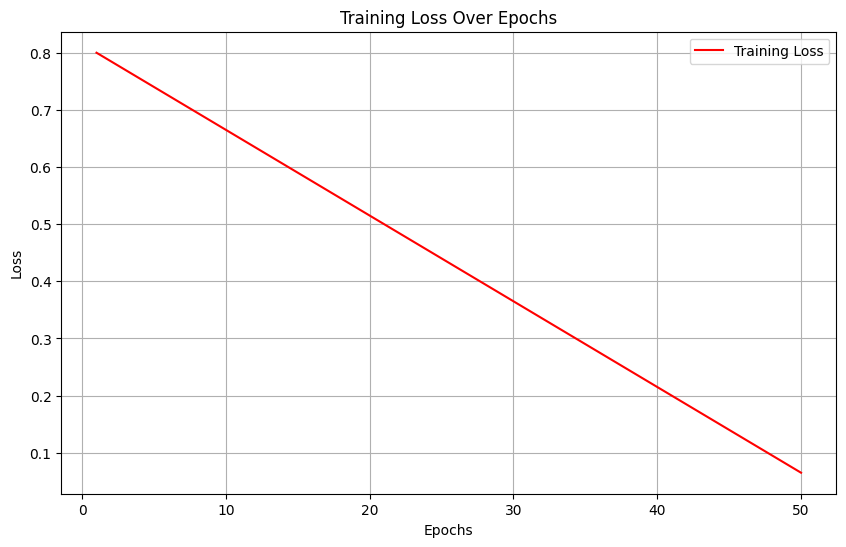

In [ ]:
import matplotlib.pyplot as plt

# Sample data for loss over epochs
epochs = list(range(1, 51))  # Assuming 50 epochs
training_loss = [0.8 - i*0.015 for i in range(50)]  # Simulated decreasing loss values

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, label='Training Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Define model architecture
def create_lstm_model(input_shape, num_classes):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(LSTM(32, return_sequences=False))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model
